# Run a batch of samples on the HPC cluster

To set-up access to the remote compute server:

1. On the local host generate keys:

```
ssh-keygen -t rsa
```

1. Copy those keys to the remote host:

```
cat ~/.ssh/id_rsa.pub | ssh user@hostname 'cat >> .ssh/authorized_keys'
```

In [ ]:
!cat /src/ansible/playbooks/hosts

In [ ]:
!ansible-playbook -i /src/ansible/playbooks/hosts /src/ansible/playbooks/covid19sim.yml --extra-vars 'host=mulab' --user=paredes

In [ ]:
!ansible -i /src/ansible/playbooks/hosts mulab --user=paredes -m copy -a "src=params/kingston_0xdfc056a4fdb804e60e964b2cc5aae6ea.yml dest=~/COVI-AgentSim/src/covid19sim/configs/simulation/region/kingston0xdfc056a4fdb804e60e964b2cc5aae6ea.yaml"

Set up the local environment for analysis

In [4]:
!ansible-playbook -i /src/ansible/playbooks/hosts /src/ansible/playbooks/covid19sim.yml


PLAY [Set-up covid19sim] *******************************************************

TASK [Gathering Facts] *********************************************************
ok: [localhost]

TASK [Create a new viritual environment] ***************************************
changed: [localhost]

TASK [Clone ctt module, required to run simulator] *****************************
changed: [localhost]

TASK [Use fixed requirements.txt] **********************************************
changed: [localhost]

TASK [Use fixed setup.py] ******************************************************
changed: [localhost]

TASK [Version of ctt module should be commit hash] *****************************
changed: [localhost]

TASK [Install ctt module] ******************************************************
changed: [localhost]

TASK [Checkout a viable commit] ************************************************
changed: [localhost]

TASK [Version of covid19sim module should be commit hash] **********************
changed: [localho

In [ ]:
!ipython kernel install --name covisim

In [ ]:
!/opt/conda/bin/conda run -n covisim conda install ipykernel -y

In [11]:
!/opt/conda/bin/conda run -n covisim conda list

# packages in environment at /opt/conda/envs/covisim:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main  
_openmp_mutex             4.5                       1_gnu  
addict                    2.3.0                    pypi_0    pypi
alabaster                 0.7.12                   pypi_0    pypi
asciitree                 0.3.3                    pypi_0    pypi
attrs                     20.3.0                   pypi_0    pypi
babel                     2.9.0                    pypi_0    pypi
backcall                  0.2.0              pyhd3eb1b0_0  
blas                      1.0                         mkl  
ca-certificates           2021.7.5             h06a4308_1  
cached-property           1.5.2                    pypi_0    pypi
cairocffi                 1.2.0                    pypi_0    pypi
cairosvg                  2.5.0                    pypi_0    pypi
certifi                   2020.6.20              

In [ ]:
!/opt/conda/bin/conda run -n covisim conda install numpy -y

In [7]:
!/opt/conda/bin/conda run -n covisim pip install pandas --upgrade

  Using cached pandas-1.3.0-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (10.6 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.5
    Uninstalling pandas-1.2.5:
      Successfully uninstalled pandas-1.2.5

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
covid19sim 8a8b9b5aa5ac4c13dd7220d856119e3916148622 requires certifi==2020.6.20, but you have certifi 2021.5.30 which is incompatible.
covid19sim 8a8b9b5aa5ac4c13dd7220d856119e3916148622 requires decorator==4.4.2, but you have decorator 5.0.9 which is incompatible.
covid19sim 8a8b9b5aa5ac4c13dd7220d856119e3916148622 requires ipython==7.19.0, but you have ipython 7.22.0 which is incompatible.
covid19sim 8a8b9b5aa5ac4c13dd7220d856119e3916148622 requires numpy==1.19.4, but you have numpy 1.20.2 which is incompatible.
covid19sim 8a8b9b5aa5ac4c13dd7220d856119e3916148622 requires 

In [8]:
!/opt/conda/bin/conda run -n covisim conda install matplotlib -y

Solving environment: ...working... done

## Package Plan ##

  environment location: /opt/conda/envs/covisim

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB
    cycler-0.10.0              |           py38_0          14 KB
    intel-openmp-2021.2.0      |     h06a4308_610         1.3 MB
    kiwisolver-1.3.1           |   py38h2531618_0          80 KB
    lcms2-2.12                 |       h3be6417_0         312 KB
    libtiff-4.2.0              |       h85742a9_0         502 KB
    libwebp-base-1.2.0         |       h27cfd23_0         437 KB
    libxml2-2.9.12             |       h03d6c58_0         1.2 MB
    lz4-c-1.9.3                |       h2531618_0         186 KB
    matplotlib-3.3.4           |   py38h06a4308_0          26 KB
    matplotlib-base-3.3.4      |   py38h62a2d02_0   

In [8]:
!ls results/data

0x323219c230079382f2af0c132c1e4294  0x9f2ac8e8a101e89b784683380614c584
0x57e7aa91fbc783d1f3cd1bf719dd5a35  0xb033e2941cac86aeff863626216dcda9


In [23]:
import os

run_id = '0x57e7aa91fbc783d1f3cd1bf719dd5a35'

samples = os.listdir(f'../data/{run_id}')
len(samples)

256

In [24]:
import pandas as pd

data = [os.listdir(f'../data/{run_id}/{s}') for s in samples]

data_df = pd.DataFrame(data, columns=['params', 'log', 'metrics'])
data_df['sample'] = samples
data_df

,params,log,metrics,sample
0,full_configuration.yaml,log_20210706-135347.txt,tracker_data_n_3000_seed_1054_20210706-140112.pkl,sim_v2_people-3000_days-60_init-0.002_uptake--...
1,full_configuration.yaml,log_20210706-140134.txt,tracker_data_n_3000_seed_1061_20210706-140858.pkl,sim_v2_people-3000_days-60_init-0.002_uptake--...
2,full_configuration.yaml,log_20210706-135348.txt,tracker_data_n_3000_seed_1106_20210706-140058.pkl,sim_v2_people-3000_days-60_init-0.002_uptake--...
3,full_configuration.yaml,log_20210706-140136.txt,tracker_data_n_3000_seed_1182_20210706-141003.pkl,sim_v2_people-3000_days-60_init-0.002_uptake--...
4,full_configuration.yaml,log_20210706-135349.txt,tracker_data_n_3000_seed_1199_20210706-140153.pkl,sim_v2_people-3000_days-60_init-0.002_uptake--...
...,...,...,...,...
251,full_configuration.yaml,log_20210706-135347.txt,tracker_data_n_3000_seed_9796_20210706-140156.pkl,sim_v2_people-3000_days-60_init-0.002_uptake--...
252,full_configuration.yaml,log_20210706-135347.txt,tracker_data_n_3000_seed_9801_20210706-140110.pkl,sim_v2_people-3000_days-60_init-0.002_uptake--...
253,full_configuration.yaml,log_20210706-135347.txt,tracker_data_n_3000_seed_9858_20210706-140141.pkl,sim_v2_people-3000_days-60_init-0.002_uptake--...
254,full_configuration.yaml,log_20210706-135348.txt,tracker_data_n_3000_seed_9868_20210706-140108.pkl,sim_v2_people-3000_days-60_init-0.002_uptake--...


In [25]:
import pickle

cases_list = []
i=0
for _, data in data_df.iterrows():
    with open(f'/src/experiments/data/{run_id}/{data["sample"]}/{data["metrics"]}', 'rb') as tracker:
        tracker_dict = pickle.load(tracker)
        cases_list.append(pd.DataFrame(tracker_dict['cases_per_day'], columns=[i]))
        i += 1
cases_df = pd.concat(cases_list, axis=1)
cases_df

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
1,0,0,0,0,0,0,0,0,0,0,...,1,2,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,2,0,1,0,...,2,2,1,2,0,1,0,1,6,2
3,1,4,1,1,2,1,0,1,2,1,...,0,7,2,7,2,2,1,1,1,1
4,0,1,6,0,1,5,4,2,5,0,...,6,9,4,3,3,3,0,1,2,1
5,2,4,1,4,4,1,1,1,0,1,...,2,3,4,8,1,2,3,0,0,0
6,4,1,8,5,5,4,1,1,3,1,...,1,3,5,8,1,1,1,2,5,0
7,10,9,11,14,14,10,13,14,10,2,...,9,16,10,18,9,16,3,7,18,8
8,0,1,1,1,1,1,0,0,0,2,...,0,0,1,2,1,0,0,0,0,1
9,0,0,1,0,2,0,0,0,0,0,...,0,2,2,3,1,1,0,1,0,2


In [ ]:
cpus = 16
compute = 16
n_samples = cpus * compute
n_samples

In [ ]:
import numpy as np
from numpy.random import default_rng
import pandas as pd

rng = default_rng()

seed_list = [rng.integers(low=0, high=1e4) for _ in range(n_samples)]

len(np.unique(seed_list)), pd.DataFrame(seed_list).hist()

In [ ]:
!ansible -i /src/ansible/playbooks/hosts mulab --user=paredes -m git -a "repo=https://github.com/alisonparedes/kingston-abm dest=~/kingston-abm"

In [ ]:
args_dict = {'region': 'kingston0xdfc056a4fdb804e60e964b2cc5aae6ea',
        'n_people': 3000,
        'simulation_days': 60,
        'init_fraction_sick': 0.002,
        'N_BEHAVIOR_LEVELS': 2,
        'intervention': 'no_intervention',
        'tune': True,
        'track': 'light',
        'GLOBAL_MOBILITY_SCALING_FACTOR': 0.85,
        'APP_UPTAKE': -1,
        'USE_INFERENCE_SERVER': False,
        'INTERVENTION_DAY': -1}
args_dict

In [ ]:
args_str = ' '.join([f'{k}={v}' for k, v in args_dict.items()])
args_str

In [ ]:
import random
import subprocess

run_id = hex(random.getrandbits(128))

args_list = [f'~/.conda/envs/covisim/bin/python ~/COVI-AgentSim/src/covid19sim/run.py seed={s} outdir=~/kingston-abm/experiments/validation/results/data/{run_id} {args_str}\n' for s in seed_list]

file_name = f'val-2-{run_id}.cmd'

with open(file_name, 'w') as arg_file:
    arg_file.writelines(args_list)
    
#subprocess.run(f'cat {file_name} | parallel -j4, shell=True, capture_output=True)

file_name

In [ ]:
!parallel --sshloginfile nodefile echo "Number {}: Running on \`hostname\`" ::: 1 2 3 4

In [ ]:
!cat val-2-0x57e7aa91fbc783d1f3cd1bf719dd5a35.cmd | parallel --sshloginfile nodefile

In [ ]:
!ansible -i /src/ansible/playbooks/hosts mulab --user=paredes -a "ls ~/kingston-abm/experiments/validation/results/data/0x57e7aa91fbc783d1f3cd1bf719dd5a35/"

In [ ]:
!ls /src/experiments/validation/results/data/0x323219c230079382f2af0c132c1e4294/*/*tracker*

In [ ]:
r = subprocess.run(f'ls /src/experiments/validation/results/data/0x323219c230079382f2af0c132c1e4294/*/*tracker*', shell=True, capture_output=True)
r.stdout

In [ ]:
!ls /src/experiments/validation/results/data

In [6]:
cases_df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,6,0,0,1,0,2,4,10,0,0,...,4,10,43,30,29,25,28,4,8,31
1,6,0,0,4,1,4,1,9,1,0,...,11,8,45,23,29,32,31,1,6,24
2,6,0,0,1,6,1,8,11,1,1,...,4,3,29,27,30,22,18,6,3,27
3,6,0,0,1,0,4,5,14,1,0,...,7,3,21,28,12,22,9,1,5,10
4,6,0,0,2,1,4,5,14,1,2,...,11,10,28,23,11,22,18,3,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,6,0,1,2,3,2,1,16,0,1,...,4,6,23,24,12,21,18,2,2,12
252,6,0,0,1,0,3,1,3,0,0,...,7,6,32,23,29,27,30,8,7,41
253,6,0,1,1,1,0,2,7,0,1,...,9,12,30,32,36,32,25,3,4,28
254,6,0,6,1,2,0,5,18,0,0,...,8,7,28,32,30,27,17,4,8,36


In [13]:
%matplotlib inline

<AxesSubplot:>

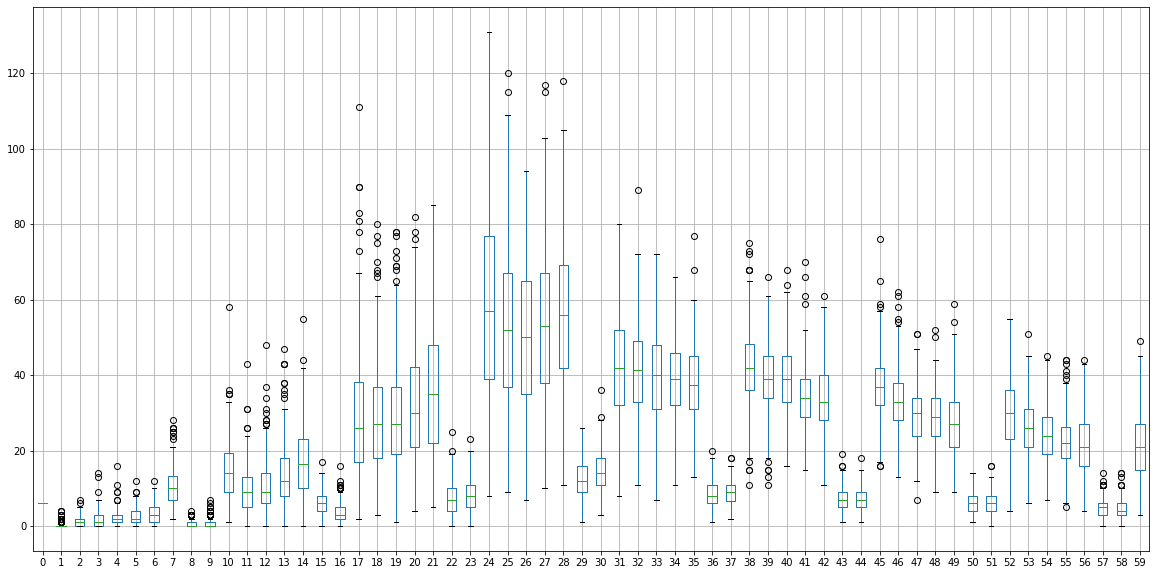

In [14]:
cases_df.transpose().boxplot(figsize=(20,10))

In [27]:
cases_df.transpose().mean(), cases_df.transpose().sem()

(0      6.000000
 1      0.207031
 2      1.023438
 3      1.804688
 4      2.171875
 5      2.554688
 6      3.199219
 7     10.757812
 8      0.613281
 9      0.824219
 10    15.109375
 11     9.667969
 12    10.707031
 13    13.953125
 14    17.066406
 15     5.914062
 16     3.511719
 17    29.628906
 18    29.425781
 19    29.351562
 20    32.804688
 21    37.066406
 22     7.468750
 23     8.273438
 24    58.816406
 25    53.214844
 26    50.714844
 27    53.085938
 28    56.027344
 29    12.292969
 30    14.902344
 31    42.175781
 32    41.812500
 33    39.976562
 34    39.019531
 35    38.132812
 36     8.843750
 37     8.675781
 38    42.171875
 39    39.167969
 40    38.527344
 41    34.179688
 42    34.105469
 43     7.449219
 44     7.355469
 45    36.894531
 46    33.300781
 47    29.648438
 48    28.687500
 49    27.625000
 50     6.085938
 51     6.148438
 52    29.593750
 53    26.328125
 54    24.238281
 55    22.378906
 56    21.675781
 57     4.859375
 58     4.7304

In [28]:
!/opt/conda/bin/conda run -n covisim conda install seaborn -y

Solving environment: ...working... done

## Package Plan ##

  environment location: /opt/conda/envs/covisim

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libgfortran-ng-7.5.0       |      ha8ba4b0_17          22 KB
    libgfortran4-7.5.0         |      ha8ba4b0_17         995 KB
    pandas-1.2.5               |   py38h295c915_0         8.8 MB
    pytz-2021.1                |     pyhd3eb1b0_0         181 KB
    scipy-1.6.2                |   py38had2a1c9_1        15.6 MB
    seaborn-0.11.1             |     pyhd3eb1b0_0         212 KB
    ------------------------------------------------------------
                                           Total:        25.8 MB

The following NEW packages will be INSTALLED:

  libgfortran-ng     pkgs/main/linux-64::libgfortran-ng-7.5.0-ha8ba4b0_17
  libgfortran4       pkgs/main/linux-64::libgfortran4-7.5.0-ha8

In [34]:
cases_df["day"] = cases_df.index
cases_df

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,day
0,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,0
1,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,2,0,1,0,...,2,1,2,0,1,0,1,6,2,2
3,1,4,1,1,2,1,0,1,2,1,...,7,2,7,2,2,1,1,1,1,3
4,0,1,6,0,1,5,4,2,5,0,...,9,4,3,3,3,0,1,2,1,4
5,2,4,1,4,4,1,1,1,0,1,...,3,4,8,1,2,3,0,0,0,5
6,4,1,8,5,5,4,1,1,3,1,...,3,5,8,1,1,1,2,5,0,6
7,10,9,11,14,14,10,13,14,10,2,...,16,10,18,9,16,3,7,18,8,7
8,0,1,1,1,1,1,0,0,0,2,...,0,1,2,1,0,0,0,0,1,8
9,0,0,1,0,2,0,0,0,0,0,...,2,2,3,1,1,0,1,0,2,9


In [59]:
cases_long_df = pd.melt(cases_df, id_vars=['day'], value_vars=[i for i in range(256)])
cases_long_df.dtypes

day          int64
variable    object
value        int64
dtype: object

In [58]:
fmri = sns.load_dataset("fmri")
fmri.dtypes

subject       object
timepoint      int64
event         object
region        object
signal       float64
dtype: object

In [39]:
cases_df.columns

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
         247,   248,   249,   250,   251,   252,   253,   254,   255, 'day'],
      dtype='object', length=257)

<AxesSubplot:xlabel='day', ylabel='value'>

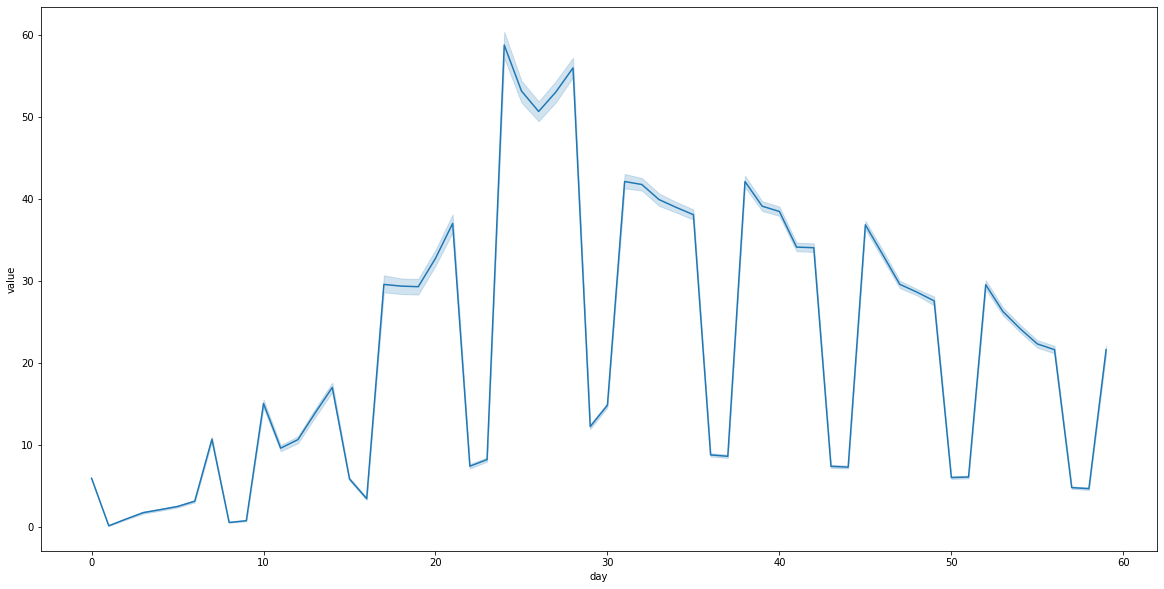

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

sns.lineplot(data=cases_long_df, x='day', y='value', estimator='mean', ci=68)

There has to be an easier way to browse all results

In [24]:
!cat /src/experiments/validation/results/data/0x57e7aa91fbc783d1f3cd1bf719dd5a35/sim_v2_people-3000_days-60_init-0.002_uptake--1_seed-1054_20210706-135347_580349/full_configuration.yaml | grep seed

In [19]:
!ls /src/experiments/validation/results/data/0x57e7aa91fbc783d1f3cd1bf719dd5a35/sim_v2_people-3000_days-60_init-0.002_uptake--1_seed-1054_20210706-135347_580349/tracker_data_n_3000_seed_1054_20210706-140112.pkl

/src/experiments/validation/results/data/0x57e7aa91fbc783d1f3cd1bf719dd5a35/sim_v2_people-3000_days-60_init-0.002_uptake--1_seed-1054_20210706-135347_580349/tracker_data_n_3000_seed_1054_20210706-140112.pkl


In [20]:
import pickle

file_name = '/src/experiments/validation/results/data/0x57e7aa91fbc783d1f3cd1bf719dd5a35/sim_v2_people-3000_days-60_init-0.002_uptake--1_seed-1054_20210706-135347_580349/tracker_data_n_3000_seed_1054_20210706-140112.pkl'
with open(file_name, 'rb') as results_file:
    tracker = pickle.load(results_file)
tracker.keys()

dict_keys(['intervention_day', 'intervention', 'risk_model', 'COVID_SPREAD_START_TIME', 'INTERVENTION_START_TIME', 'SIMULATION_START_TIME', 'simulation_days', 'n_humans', 'n_init_infected', 'adoption_rate', 'generation_times', 'p_transmission', 'age_histogram', 'human_has_app', 'known_connections', 'humans_demographics', 'contact_patterns', 'infectious_contact_patterns', 'expected_mobility', 'mobility', 'infection_monitor', 'outside_daily_contacts', 'effective_contacts_since_intervention', 'healthy_effective_contacts_since_intervention', 'effective_contacts_all_days', 'healthy_effective_contacts_all_days', 'serial_interval', 'all_serial_intervals', 'cases_per_day', 'ei_per_day', 's', 'e', 'i', 'r', 'avg_infectiousness_per_day', 'covid_properties', 'recovered_stats', 'symptoms', 'test_monitor', 'risk_precision_global', 'risk_precision', 'human_monitor', 'infector_infectee_update_messages', 'risk_attributes', 'humans_state', 'humans_rec_level', 'humans_intervention_level', 'to_human_max_

Plot compartment model

In [28]:
import pickle

s_list = []
e_list = []
i_list = []
r_list = []

i=0
for _, data in data_df.iterrows():
    with open(f'/src/experiments/data/{run_id}/{data["sample"]}/{data["metrics"]}', 'rb') as tracker:
        tracker_dict = pickle.load(tracker)
        s_list.append(pd.DataFrame(tracker_dict['s'], columns=[i]))
        e_list.append(pd.DataFrame(tracker_dict['e'], columns=[i]))
        i_list.append(pd.DataFrame(tracker_dict['i'], columns=[i]))
        r_list.append(pd.DataFrame(tracker_dict['r'], columns=[i]))
        i += 1
        
s_df = pd.concat(s_list, axis=1)
e_df = pd.concat(e_list, axis=1)
i_df = pd.concat(i_list, axis=1)
r_df = pd.concat(r_list, axis=1)

s_df

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,2994,2994,2994,2994,2994,2994,2994,2994,2994,2994,...,2994,2994,2994,2994,2994,2994,2994,2994,2994,2994
1,2994,2994,2994,2994,2994,2994,2994,2994,2994,2994,...,2994,2994,2994,2994,2994,2994,2994,2994,2994,2994
2,2994,2994,2994,2994,2994,2994,2994,2994,2994,2994,...,2993,2992,2994,2994,2994,2994,2994,2994,2994,2994
3,2994,2994,2994,2994,2994,2994,2992,2994,2993,2994,...,2991,2990,2993,2992,2994,2993,2994,2993,2988,2992
4,2993,2990,2993,2993,2992,2993,2992,2993,2991,2993,...,2991,2983,2991,2985,2992,2991,2993,2992,2987,2991
5,2993,2989,2987,2993,2991,2988,2988,2991,2986,2993,...,2985,2974,2987,2982,2989,2988,2993,2991,2985,2990
6,2991,2985,2986,2989,2987,2987,2987,2990,2986,2992,...,2983,2971,2983,2974,2988,2986,2990,2991,2985,2990
7,2987,2984,2978,2984,2982,2983,2986,2989,2983,2991,...,2982,2968,2978,2966,2987,2985,2989,2989,2980,2990
8,2977,2975,2967,2970,2968,2973,2973,2975,2973,2989,...,2973,2952,2968,2948,2978,2969,2986,2982,2962,2982
9,2977,2974,2966,2969,2967,2972,2973,2975,2973,2987,...,2973,2952,2967,2946,2977,2969,2986,2982,2962,2981


<AxesSubplot:>

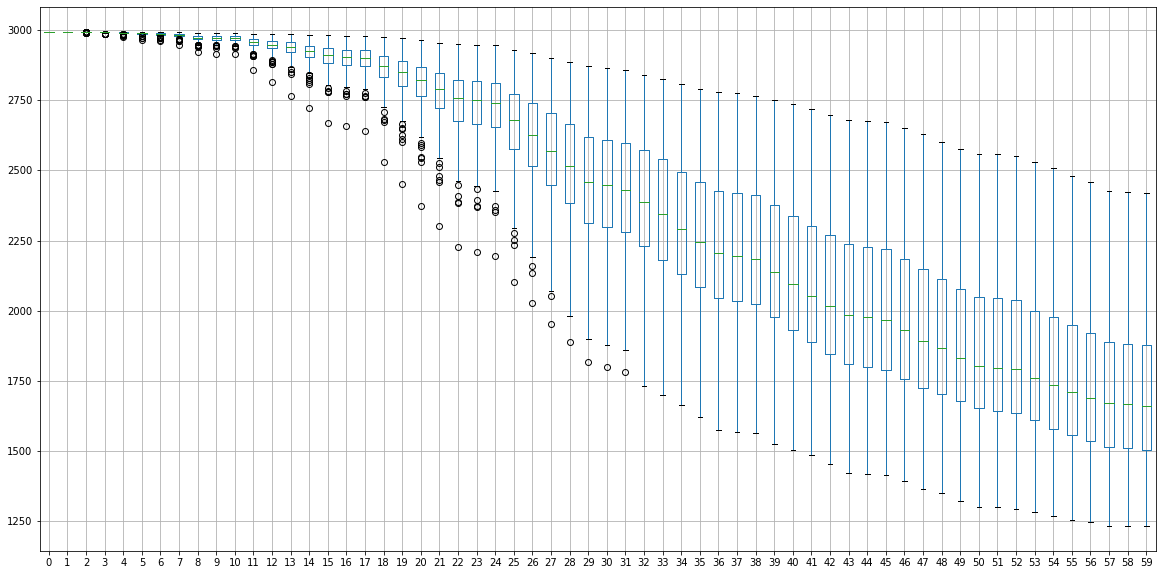

In [69]:
s_df.transpose().boxplot(figsize=(20,10))

<AxesSubplot:>

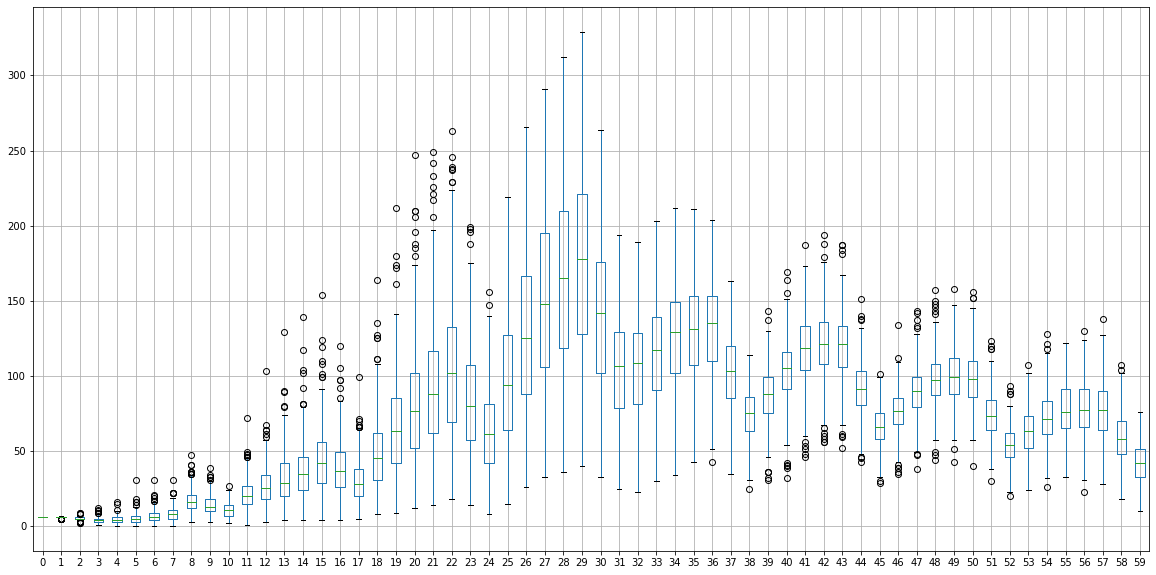

In [70]:
e_df.transpose().boxplot(figsize=(20,10))

<AxesSubplot:>

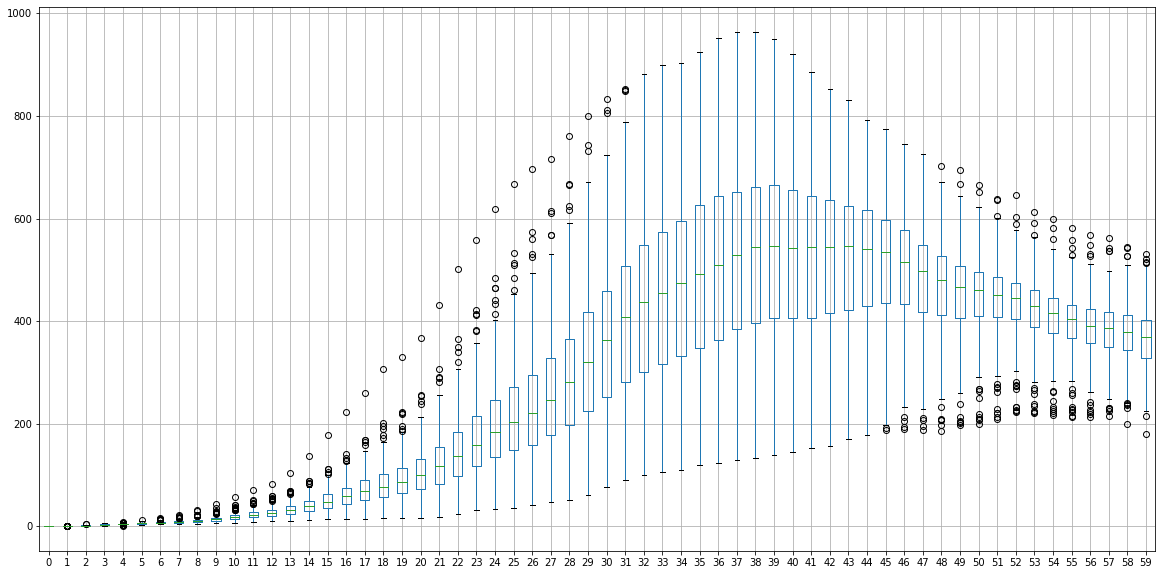

In [71]:
i_df.transpose().boxplot(figsize=(20,10))

<AxesSubplot:>

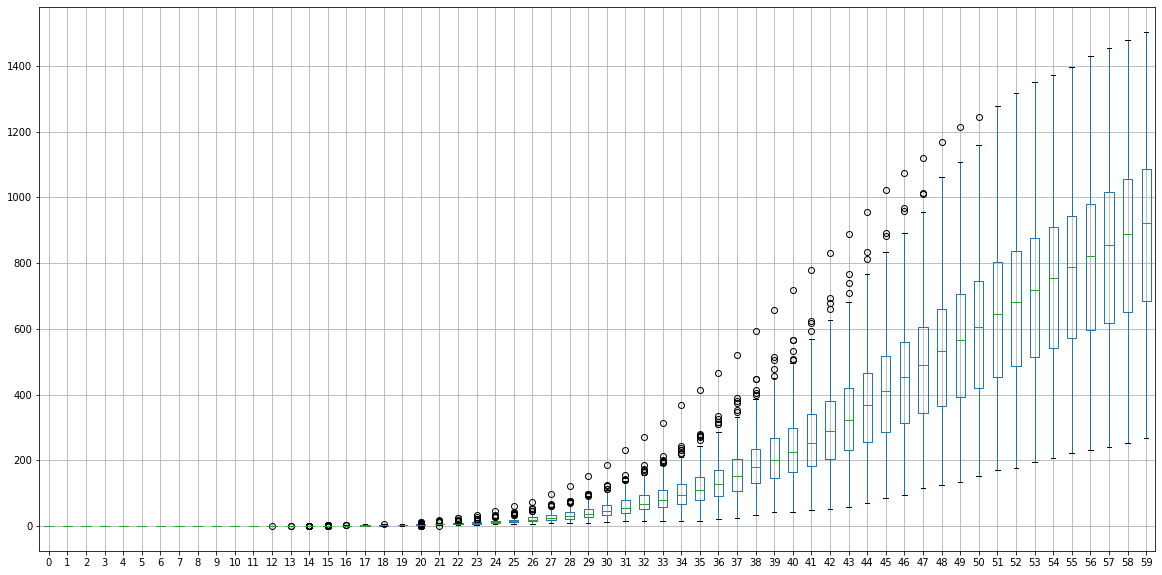

In [72]:
r_df.transpose().boxplot(figsize=(20,10))

In [32]:
s_df['day'] = s_df.index
e_df['day'] = e_df.index
i_df['day'] = i_df.index
r_df['day'] = r_df.index
s_long_df = pd.melt(s_df, id_vars=['day'], value_vars=[i for i in range(256)])
e_long_df = pd.melt(e_df, id_vars=['day'], value_vars=[i for i in range(256)])
i_long_df = pd.melt(i_df, id_vars=['day'], value_vars=[i for i in range(256)])
r_long_df = pd.melt(r_df, id_vars=['day'], value_vars=[i for i in range(256)])
s_long_df['seir'] = 's'
e_long_df['seir'] = 'e'
i_long_df['seir'] = 'i'
r_long_df['seir'] = 'r'
seir_long_df = pd.concat([s_long_df, e_long_df, i_long_df, r_long_df])
seir_long_df.head()

,day,variable,value,seir
0,0,0,2994,s
1,1,0,2994,s
2,2,0,2994,s
3,3,0,2994,s
4,4,0,2993,s


<AxesSubplot:xlabel='day', ylabel='value'>

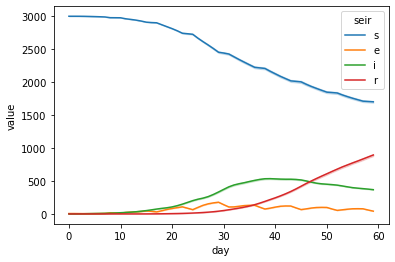

In [34]:
import seaborn as sns

%matplotlib inline

sns.lineplot(data=seir_long_df, 
             x='day', 
             y='value', 
             hue='seir', 
             estimator='mean', 
             ci=68)

In [9]:
!ls ../data/*dd5a35/ #*seed-1054*

sim_v2_people-3000_days-60_init-0.002_uptake--1_seed-1054_20210706-135347_580349
sim_v2_people-3000_days-60_init-0.002_uptake--1_seed-1061_20210706-140134_660628
sim_v2_people-3000_days-60_init-0.002_uptake--1_seed-1106_20210706-135348_335740
sim_v2_people-3000_days-60_init-0.002_uptake--1_seed-1182_20210706-140136_118402
sim_v2_people-3000_days-60_init-0.002_uptake--1_seed-1199_20210706-135349_593999
sim_v2_people-3000_days-60_init-0.002_uptake--1_seed-119_20210706-135346_035257
sim_v2_people-3000_days-60_init-0.002_uptake--1_seed-1237_20210706-140133_510411
sim_v2_people-3000_days-60_init-0.002_uptake--1_seed-1305_20210706-140123_298099
sim_v2_people-3000_days-60_init-0.002_uptake--1_seed-131_20210706-135348_715215
sim_v2_people-3000_days-60_init-0.002_uptake--1_seed-1348_20210706-135348_747110
sim_v2_people-3000_days-60_init-0.002_uptake--1_seed-1411_20210706-135348_125383
sim_v2_people-3000_days-60_init-0.002_uptake--1_seed-141_20210706-135347_747003
sim_v2_people-3000_days-60_init

In [18]:
import glob
import os
import yaml

#os.path.abspath('../data/*dd5a35/*seed-1054*')

with open(glob.glob('../data/*dd5a35/*seed-1054*/*.yaml')[0], 'r') as f:
    config = yaml.safe_load(f)

config.keys()

dict_keys(['ADJUSTED_CONTACT_MATRIX_ALL', 'ADJUSTED_CONTACT_MATRIX_HOUSEHOLD', 'ADJUSTED_CONTACT_MATRIX_OTHER', 'ADJUSTED_CONTACT_MATRIX_SCHOOL', 'ADJUSTED_CONTACT_MATRIX_WORKPLACE', 'AGE_AFFECTS_CAREFULNESS', 'AGE_DIFFERENCE_BETWEEN_PARENT_AND_KID', 'AGE_FACTOR_VIRAL_LOAD_HEIGHT', 'ALL_LEVELS_DROPOUT', 'APP_UPTAKE', 'ASSUME_NO_ENVIRONMENTAL_INFECTION_AFTER_INTERVENTION_START', 'ASSUME_NO_UNKNOWN_INTERACTIONS_AFTER_INTERVENTION_START', 'ASSUME_SAFE_HOSPITAL_DAILY_INTERACTIONS_AFTER_INTERVENTION_START', 'ASYMPTOMATIC_INFECTION_RATIO', 'AVERAGE_AGE_REGION', 'AVERAGE_DAYS_DEATH_IF_CRITICAL', 'AVERAGE_DAYS_RECOVERY_IF_CRITICAL', 'AVERAGE_DAYS_RECOVERY_IF_HOSPITALIZED', 'AVERAGE_DAYS_TO_CRITICAL_IF_HOSPITALIZED', 'AVERAGE_DAYS_TO_HOSPITAL_GIVEN_SYMPTOMS', 'AVERAGE_N_EMPLOYEES_PER_MISC', 'AVERAGE_N_EMPLOYEES_PER_STORE', 'AVERAGE_N_EMPLOYEES_PER_WORKPLACE', 'AVERAGE_TIME_AWAKE', 'AVERAGE_TIME_SLEEPING', 'AVERAGE_TIME_SPENT_EXERCISING', 'AVERAGE_TIME_SPENT_GROCERY', 'AVERAGE_TIME_SPENT_SOCIALI

In [29]:
config['n_people'], config['simulation_days']

(3000, 60)